참고 노트북
- [링크](https://www.kaggle.com/code/mursideyarkin/mobile-games-ab-testing-with-cookie-cats/notebook)

이 노트북에서 배울 수 있는 것
- AB test

와 AB test에 대한 감이 아예 없네

분석 배경
- cookie-cats라는 게임에서 gate를 어디에 세울지 정하려고
- gate는 시간을 기다리거나 or 유료 결제

In [47]:
import kagglehub
import warnings
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("mursideyarkin/mobile-games-ab-testing-cookie-cats")

In [39]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "cookie_cats.csv"))

In [40]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [42]:
n_user = df["userid"].nunique()
print(n_user)
print(df.shape[0] == n_user)

90189
True


In [43]:
df.groupby("version")[["userid"]].nunique()

# -> A/B 테스트하기 전 비슷한 숫자가 존재하는지 확인!

,userid
version,
gate_30,44700
gate_40,45489


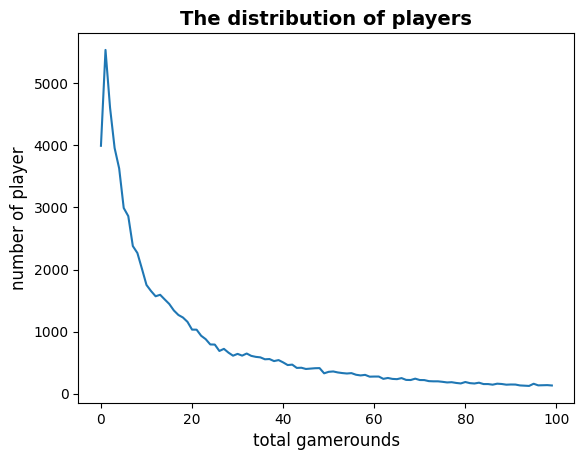

In [44]:
import matplotlib.pyplot as plt
# The distribution of game rounds

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby("sum_gamerounds")["userid"].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()

In [ ]:
df[df["sum_gamerounds"]== 0]["userid"].count()

# -> 설치해놓고 안한사람도 이정도나 존재하는구나

3994

In [48]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-day retention ratio: {round(df_retention[0],2)}% \
      \n7-days retention ratio: {round(df_retention[1],2)}%")

1-day retention ratio: 44.52%       
7-days retention ratio: 18.61%


In [49]:
# Calculating 1-day and 7-days retention for each A/B group
df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


sum_gamerounds가 30 or 40보다 적으면 의미없는거 아닌가?

In [50]:
print(df['retention_1'].value_counts(normalize=True))
print(df['retention_7'].value_counts(normalize=True))

retention_1
False    0.55479
True     0.44521
Name: proportion, dtype: float64
retention_7
False    0.813935
True     0.186065
Name: proportion, dtype: float64


In [51]:
# version으로 그룹 묶어서 retention_1과 retention_7의 차이 비교
print(df.groupby('version')[['retention_1', 'retention_7']].mean())

         retention_1  retention_7
version                          
gate_30     0.448188     0.190201
gate_40     0.442283     0.182000


gate_30 > gate_40 ??

In [52]:
df[df['userid']==488]

,userid,version,sum_gamerounds,retention_1,retention_7
4,488,gate_40,179,True,True


## A/B Testing: Bootstrapping